In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
open = pd.read_csv('email_opened_table.csv')
email = pd.read_csv('email_table.csv')
click = pd.read_csv('link_clicked_table.csv')

In [3]:
open

,email_id
0,284534
1,609056
2,220820
3,905936
4,164034
...,...
10340,990213
10341,918210
10342,200299
10343,211104


In [4]:
open['opened'] = 1
open

,email_id,opened
0,284534,1
1,609056,1
2,220820,1
3,905936,1
4,164034,1
...,...,...
10340,990213,1
10341,918210,1
10342,200299,1
10343,211104,1


In [5]:
click

,email_id
0,609056
1,870980
2,935124
3,158501
4,177561
...,...
2114,873162
2115,435454
2116,206772
2117,742967


In [6]:
click['clicked'] = 1
click

,email_id,clicked
0,609056,1
1,870980,1
2,935124,1
3,158501,1
4,177561,1
...,...,...
2114,873162,1
2115,435454,1
2116,206772,1
2117,742967,1


In [7]:
df = pd.merge(open, click, on='email_id', how='outer')

In [8]:
new_df = pd.merge(df, email, on='email_id', how='outer')
new_df

,email_id,opened,clicked,email_text,email_version,hour,weekday,user_country,user_past_purchases
0,8,NaN,NaN,short_email,generic,9,Thursday,US,3
1,33,NaN,NaN,long_email,personalized,6,Monday,US,0
2,46,NaN,NaN,short_email,generic,14,Tuesday,US,3
3,49,1.0,NaN,long_email,personalized,11,Thursday,US,10
4,65,NaN,NaN,short_email,generic,8,Wednesday,UK,3
...,...,...,...,...,...,...,...,...,...
99995,999969,NaN,NaN,short_email,generic,21,Thursday,US,0
99996,999972,NaN,NaN,long_email,personalized,6,Tuesday,US,5
99997,999976,NaN,NaN,long_email,personalized,5,Wednesday,UK,0
99998,999980,NaN,NaN,long_email,generic,10,Thursday,FR,4


In [9]:
new_df.sample(10)

,email_id,opened,clicked,email_text,email_version,hour,weekday,user_country,user_past_purchases
60081,599737,NaN,NaN,long_email,generic,8,Monday,US,8
64882,647736,NaN,NaN,short_email,personalized,19,Wednesday,US,4
80231,801256,1.0,NaN,short_email,personalized,9,Saturday,US,6
79208,790887,NaN,NaN,short_email,personalized,13,Wednesday,US,1
5787,56731,NaN,NaN,short_email,generic,3,Monday,US,1
42501,422890,1.0,NaN,long_email,generic,10,Sunday,ES,13
95622,956303,NaN,NaN,short_email,generic,5,Tuesday,US,6
32599,323971,NaN,NaN,long_email,generic,3,Sunday,ES,0
38320,380968,NaN,NaN,short_email,personalized,10,Tuesday,US,3
91193,911558,NaN,NaN,short_email,generic,3,Saturday,US,8


In [10]:
new_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 9 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   email_id             100000 non-null  int64  
 1   opened               10345 non-null   float64
 2   clicked              2119 non-null    float64
 3   email_text           100000 non-null  object 
 4   email_version        100000 non-null  object 
 5   hour                 100000 non-null  int64  
 6   weekday              100000 non-null  object 
 7   user_country         100000 non-null  object 
 8   user_past_purchases  100000 non-null  int64  
dtypes: float64(2), int64(3), object(4)
memory usage: 6.9+ MB


In [11]:
new_df['opened'] = new_df['opened'].fillna(0).astype(int)
new_df['clicked'] = new_df['clicked'].fillna(0).astype(int)

In [12]:
new_df

,email_id,opened,clicked,email_text,email_version,hour,weekday,user_country,user_past_purchases
0,8,0,0,short_email,generic,9,Thursday,US,3
1,33,0,0,long_email,personalized,6,Monday,US,0
2,46,0,0,short_email,generic,14,Tuesday,US,3
3,49,1,0,long_email,personalized,11,Thursday,US,10
4,65,0,0,short_email,generic,8,Wednesday,UK,3
...,...,...,...,...,...,...,...,...,...
99995,999969,0,0,short_email,generic,21,Thursday,US,0
99996,999972,0,0,long_email,personalized,6,Tuesday,US,5
99997,999976,0,0,long_email,personalized,5,Wednesday,UK,0
99998,999980,0,0,long_email,generic,10,Thursday,FR,4


In [13]:
new_df.info

<bound method DataFrame.info of        email_id  opened  clicked   email_text email_version  hour    weekday  \
0             8       0        0  short_email       generic     9   Thursday   
1            33       0        0   long_email  personalized     6     Monday   
2            46       0        0  short_email       generic    14    Tuesday   
3            49       1        0   long_email  personalized    11   Thursday   
4            65       0        0  short_email       generic     8  Wednesday   
...         ...     ...      ...          ...           ...   ...        ...   
99995    999969       0        0  short_email       generic    21   Thursday   
99996    999972       0        0   long_email  personalized     6    Tuesday   
99997    999976       0        0   long_email  personalized     5  Wednesday   
99998    999980       0        0   long_email       generic    10   Thursday   
99999    999998       0        0   long_email       generic    16     Friday   

      u

In [14]:
def get_engagement_status(row):
    if row['clicked'] == 1 and row['opened'] == 1:
        return "Clicked and Opened"
    elif row['opened'] == 1 and row['clicked'] == 0:
        return "Opened but Not Clicked"
    elif row['opened'] == 0 and row['clicked'] == 0:
        return "Not Opened"
    else:
       
        return "Anomaly"

new_df['engagement_status'] = new_df.apply(get_engagement_status, axis=1)

print(new_df['engagement_status'].value_counts())
new_df.head()

engagement_status
Not Opened                89605
Opened but Not Clicked     8276
Clicked and Opened         2069
Anomaly                      50
Name: count, dtype: int64


,email_id,opened,clicked,email_text,email_version,hour,weekday,user_country,user_past_purchases,engagement_status
0,8,0,0,short_email,generic,9,Thursday,US,3,Not Opened
1,33,0,0,long_email,personalized,6,Monday,US,0,Not Opened
2,46,0,0,short_email,generic,14,Tuesday,US,3,Not Opened
3,49,1,0,long_email,personalized,11,Thursday,US,10,Opened but Not Clicked
4,65,0,0,short_email,generic,8,Wednesday,UK,3,Not Opened


In [15]:
new_df

,email_id,opened,clicked,email_text,email_version,hour,weekday,user_country,user_past_purchases,engagement_status
0,8,0,0,short_email,generic,9,Thursday,US,3,Not Opened
1,33,0,0,long_email,personalized,6,Monday,US,0,Not Opened
2,46,0,0,short_email,generic,14,Tuesday,US,3,Not Opened
3,49,1,0,long_email,personalized,11,Thursday,US,10,Opened but Not Clicked
4,65,0,0,short_email,generic,8,Wednesday,UK,3,Not Opened
...,...,...,...,...,...,...,...,...,...,...
99995,999969,0,0,short_email,generic,21,Thursday,US,0,Not Opened
99996,999972,0,0,long_email,personalized,6,Tuesday,US,5,Not Opened
99997,999976,0,0,long_email,personalized,5,Wednesday,UK,0,Not Opened
99998,999980,0,0,long_email,generic,10,Thursday,FR,4,Not Opened


In [16]:
new_df

,email_id,opened,clicked,email_text,email_version,hour,weekday,user_country,user_past_purchases,engagement_status
0,8,0,0,short_email,generic,9,Thursday,US,3,Not Opened
1,33,0,0,long_email,personalized,6,Monday,US,0,Not Opened
2,46,0,0,short_email,generic,14,Tuesday,US,3,Not Opened
3,49,1,0,long_email,personalized,11,Thursday,US,10,Opened but Not Clicked
4,65,0,0,short_email,generic,8,Wednesday,UK,3,Not Opened
...,...,...,...,...,...,...,...,...,...,...
99995,999969,0,0,short_email,generic,21,Thursday,US,0,Not Opened
99996,999972,0,0,long_email,personalized,6,Tuesday,US,5,Not Opened
99997,999976,0,0,long_email,personalized,5,Wednesday,UK,0,Not Opened
99998,999980,0,0,long_email,generic,10,Thursday,FR,4,Not Opened


In [17]:
anomaly = new_df['engagement_status'] == 'Anomaly'
new_df = new_df[~anomaly]

In [18]:
(new_df['engagement_status'] == 'Anomaly').sum()

np.int64(0)

In [19]:
new_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 99950 entries, 0 to 99999
Data columns (total 10 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   email_id             99950 non-null  int64 
 1   opened               99950 non-null  int64 
 2   clicked              99950 non-null  int64 
 3   email_text           99950 non-null  object
 4   email_version        99950 non-null  object
 5   hour                 99950 non-null  int64 
 6   weekday              99950 non-null  object
 7   user_country         99950 non-null  object
 8   user_past_purchases  99950 non-null  int64 
 9   engagement_status    99950 non-null  object
dtypes: int64(5), object(5)
memory usage: 8.4+ MB


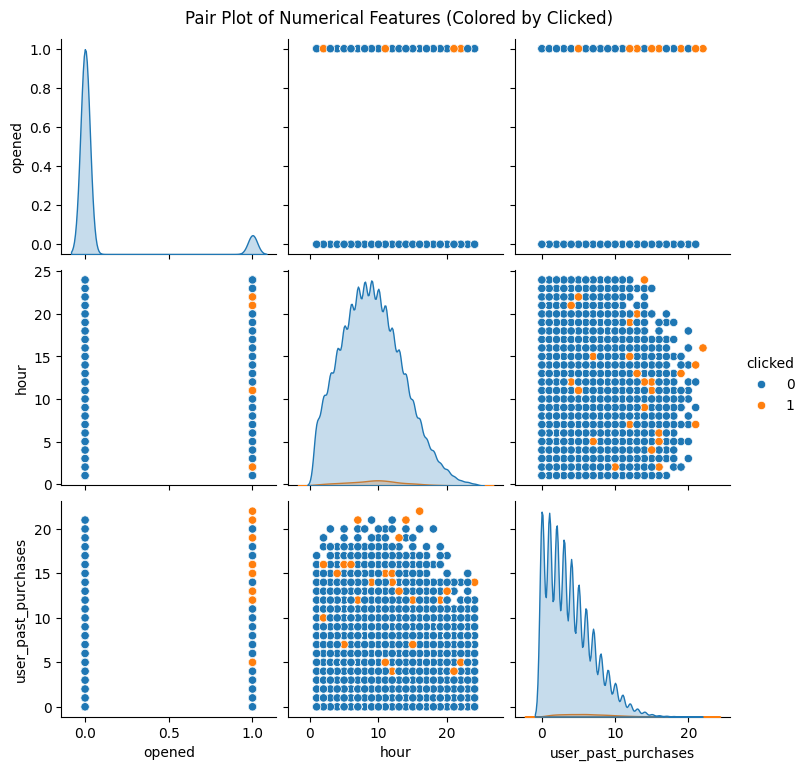

In [20]:
num_col = ['opened', 'clicked', 'hour', 'user_past_purchases' ]
sns.pairplot(new_df[num_col], hue='clicked', diag_kind='kde')
plt.suptitle('Pair Plot of Numerical Features (Colored by Clicked)', y=1.02)
plt.show()

C:\Users\gaura\AppData\Local\Temp\ipykernel_7600\916174369.py:2: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(data=new_df, x='user_past_purchases', y='clicked', ci=None, palette='viridis')
C:\Users\gaura\AppData\Local\Temp\ipykernel_7600\916174369.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=new_df, x='user_past_purchases', y='clicked', ci=None, palette='viridis')


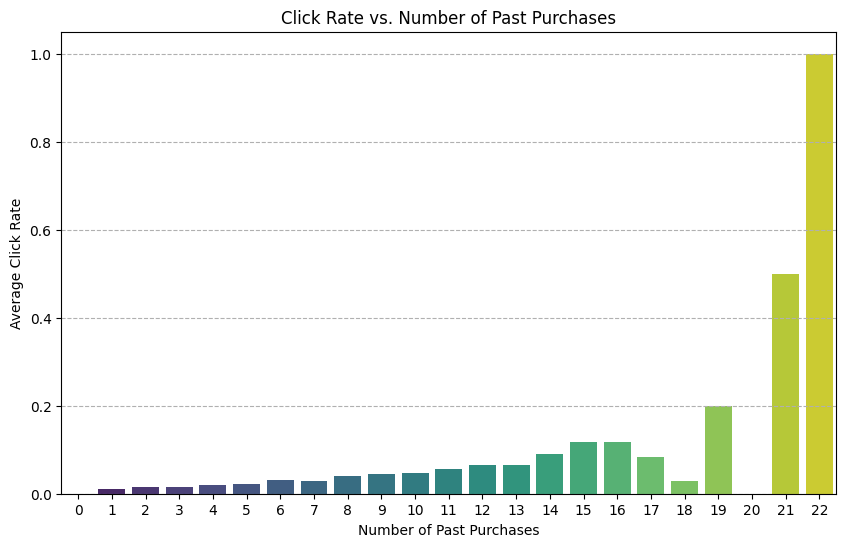

In [21]:
plt.figure(figsize=(10, 6))
sns.barplot(data=new_df, x='user_past_purchases', y='clicked', ci=None, palette='viridis')
plt.title('Click Rate vs. Number of Past Purchases')
plt.xlabel('Number of Past Purchases')
plt.ylabel('Average Click Rate')
plt.grid(axis='y', linestyle='--')

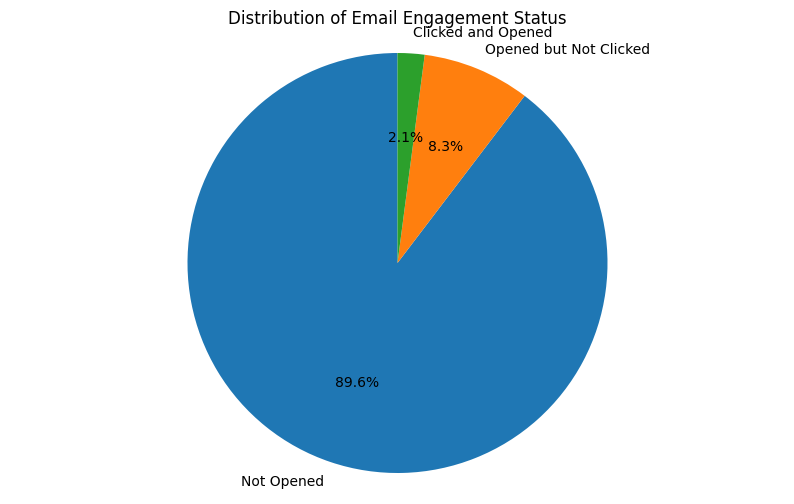

In [22]:
plt.figure(figsize=(10, 6))
engagement_counts = new_df['engagement_status'].value_counts()
plt.pie(engagement_counts.values, labels=engagement_counts.index, autopct='%1.1f%%', startangle=90)
plt.title('Distribution of Email Engagement Status')
plt.axis('equal')
plt.show()


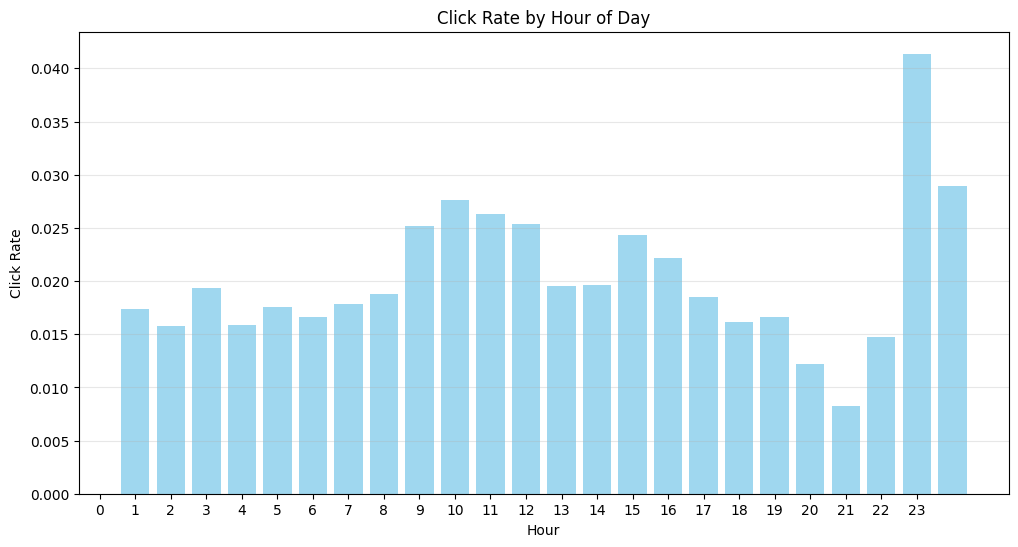

In [23]:
plt.figure(figsize=(12, 6))
hourly_click_rate = new_df.groupby('hour')['clicked'].mean()
plt.bar(hourly_click_rate.index, hourly_click_rate.values, color='skyblue', alpha=0.8)
plt.title('Click Rate by Hour of Day')
plt.xlabel('Hour')
plt.ylabel('Click Rate')
plt.xticks(range(0, 24))
plt.grid(axis='y', alpha=0.3)
plt.show()


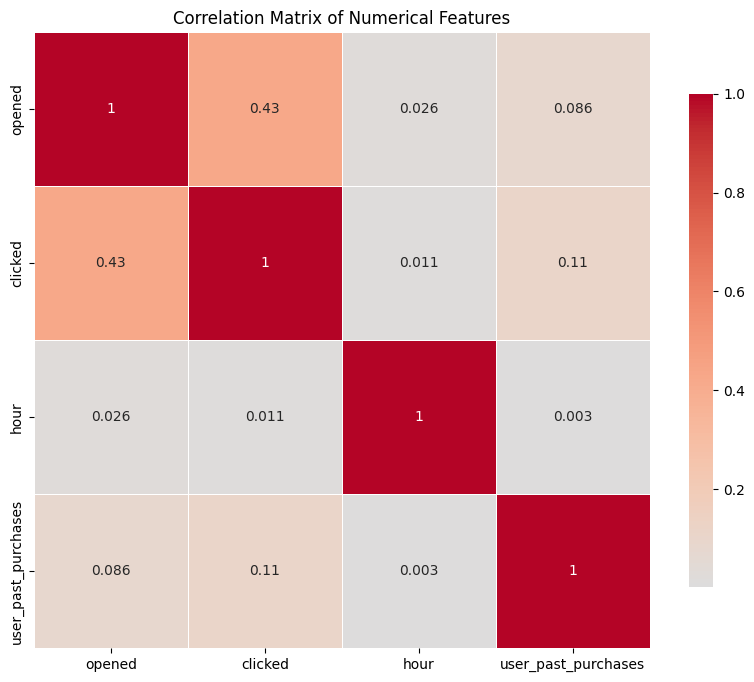

In [24]:
plt.figure(figsize=(10, 8))
correlation_matrix = new_df[num_col].corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', center=0, 
            square=True, linewidths=0.5, cbar_kws={"shrink": .8})
plt.title('Correlation Matrix of Numerical Features')
plt.show()

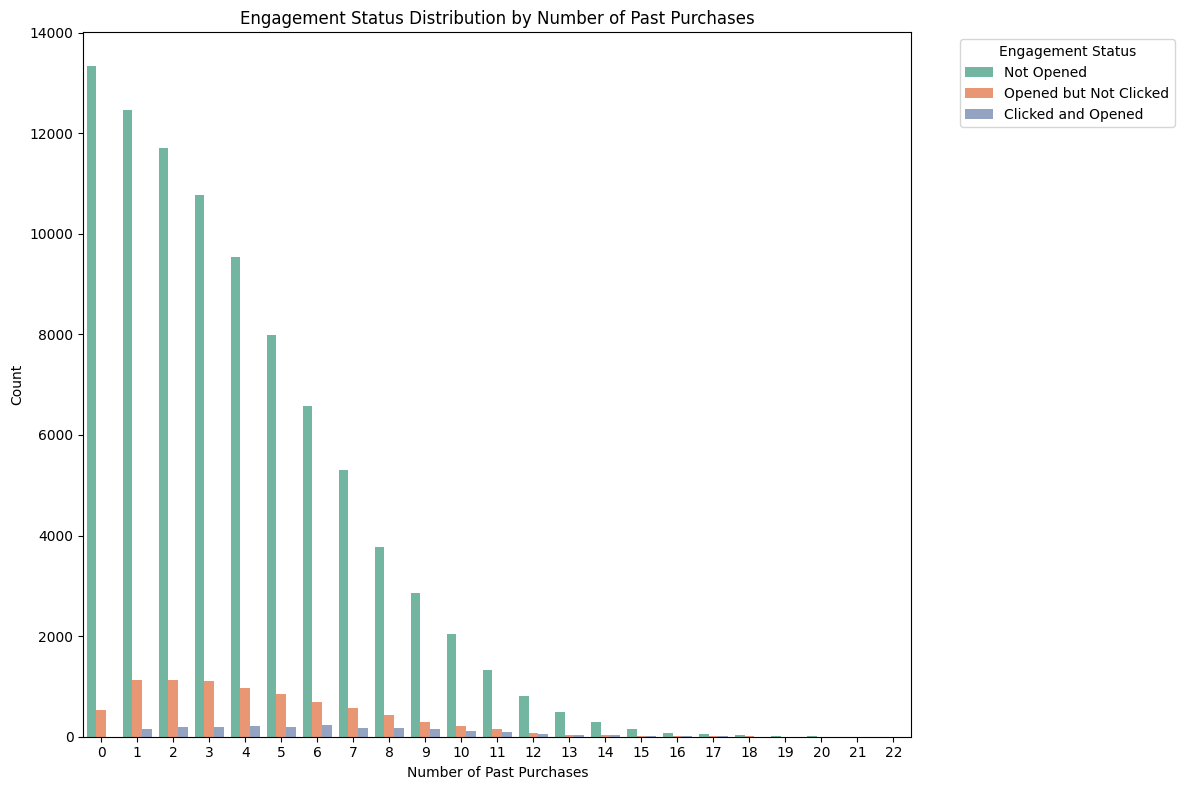

In [25]:
plt.figure(figsize=(12, 8))
sns.countplot(data=new_df, x='user_past_purchases', hue='engagement_status', palette='Set2')
plt.title('Engagement Status Distribution by Number of Past Purchases')
plt.xlabel('Number of Past Purchases')
plt.ylabel('Count')
plt.legend(title='Engagement Status', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()


C:\Users\gaura\AppData\Local\Temp\ipykernel_7600\4293853220.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=new_df, x='clicked', y='user_past_purchases', palette='viridis')


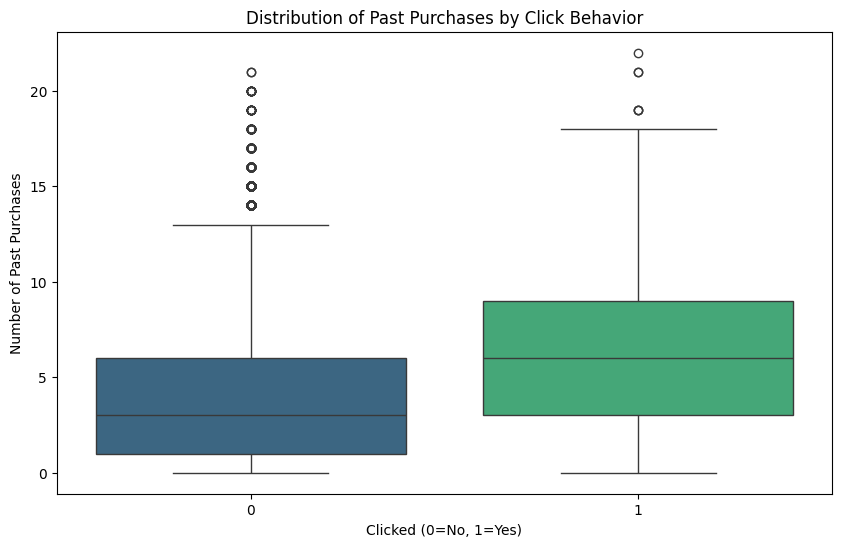

In [26]:
plt.figure(figsize=(10, 6))
sns.boxplot(data=new_df, x='clicked', y='user_past_purchases', palette='viridis')
plt.title('Distribution of Past Purchases by Click Behavior')
plt.xlabel('Clicked (0=No, 1=Yes)')
plt.ylabel('Number of Past Purchases')
plt.show()


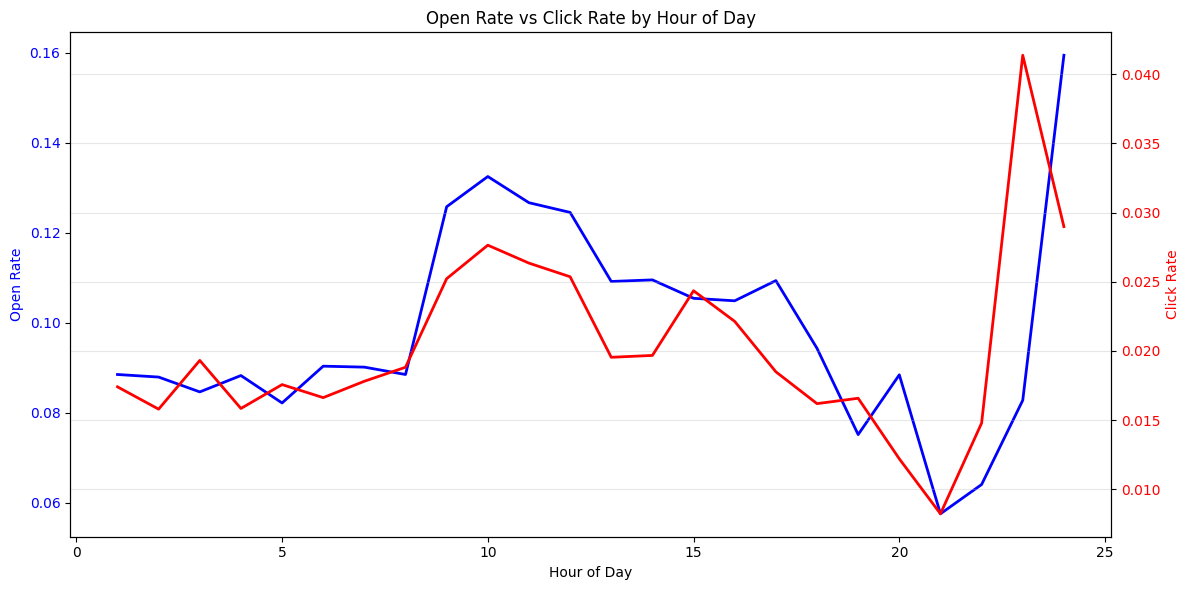

In [27]:
fig, ax1 = plt.subplots(figsize=(12, 6))
hourly_open_rate = new_df.groupby('hour')['opened'].mean()
hourly_click_rate = new_df.groupby('hour')['clicked'].mean()

ax1.plot(hourly_open_rate.index, hourly_open_rate.values, 'b-', label='Open Rate', linewidth=2)
ax1.set_xlabel('Hour of Day')
ax1.set_ylabel('Open Rate', color='b')
ax1.tick_params(axis='y', labelcolor='b')

ax2 = ax1.twinx()
ax2.plot(hourly_click_rate.index, hourly_click_rate.values, 'r-', label='Click Rate', linewidth=2)
ax2.set_ylabel('Click Rate', color='r')
ax2.tick_params(axis='y', labelcolor='r')

plt.title('Open Rate vs Click Rate by Hour of Day')
plt.grid(alpha=0.3)
plt.tight_layout()
plt.show()